# Chapter 19 Generation Data Persistence


vae/diffusion_pytorch_model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/home/xhinker/az_git_folder/azcode/azcode_venv_p310/lib/python3.10/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

Pipelines loaded with `torch_dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, due to the lack of support for`float16` operations on this device in PyTorch. Please, remove the `torch_dtype=torch.float16` argument, or use another device for inference.
Pipelines loaded with `torch_dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipeline in inference, due to the lack of support for`float16` operations on this device in PyTorch. Please, remove the `torch_dtype=torch.float16` argument, or use another device for inference.
Pipelines loaded with `torch_dtype=torch.float16` cannot run with `cpu` device. It is not recommended to move them to `cpu` as running them will fail. Please make sure to use an accelerator to run the pipelin

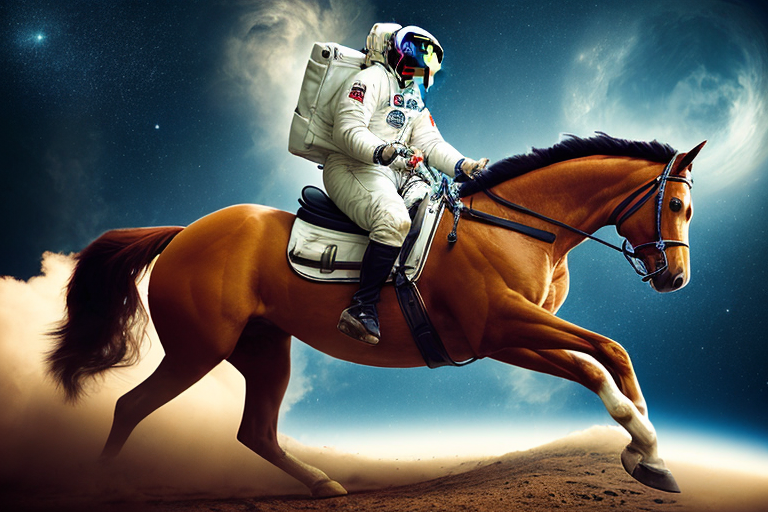

In [14]:
import torch
from diffusers import StableDiffusionPipeline

model_id = "stablediffusionapi/deliberate-v2"
text2img_pipe = StableDiffusionPipeline.from_pretrained(
    model_id
    , torch_dtype = torch.float16
)

gen_meta = {
    "model_id": model_id
    , "prompt": "high resolution, a photograph of an astronaut riding a horse"
    , "seed": 123
    , "inference_steps": 30
    , "height": 512
    , "width": 768
    , "guidance_scale": 7.5
}

text2img_pipe.to("cuda:0")
input_image = text2img_pipe(
    prompt            = gen_meta["prompt"]
    , generator       = torch.Generator("cuda:0").manual_seed(gen_meta["seed"])
    , guidance_scale  = gen_meta["guidance_scale"]
    , height          = gen_meta["height"]
    , width           = gen_meta["width"]
).images[0]
text2img_pipe.to("cpu")
torch.cuda.empty_cache()
input_image

## 2. Store data to PNG image file

In [17]:
from PIL import Image
from PIL import PngImagePlugin
import json

# Open the original image
image = input_image#Image.open("input_image.png")

# Define the metadata you want to add
metadata = PngImagePlugin.PngInfo()
gen_meta_str = json.dumps(gen_meta)
metadata.add_text("my_sd_gen_meta", gen_meta_str)

# add a copy right json object
copyright_meta = {
    "author":"Andrew Zhu"
    ,"license":"free use"
}
copyright_meta_str = json.dumps(copyright_meta)
metadata.add_text("copy_right", copyright_meta_str)

# Save the image with the added metadata
image.save("output_image_with_metadata.png", "PNG", pnginfo=metadata)

## 3. Extract data out from PNG image file

In [18]:
from PIL import Image 
image = Image.open("output_image_with_metadata.png")
#image.load()

metadata = image.info

# print the meta
for key, value in metadata.items():
    print(f"{key}: {value}")

my_sd_gen_meta: {"model_id": "stablediffusionapi/deliberate-v2", "prompt": "high resolution, a photograph of an astronaut riding a horse", "seed": 123, "inference_steps": 30, "height": 512, "width": 768, "guidance_scale": 7.5}
copy_right: {"author": "Andrew Zhu", "license": "free use"}
